In [1]:
# 한글폰트
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
!apt-get update -qq
!apt-get install fonte-nanum* -qq

import matplotlib.font_manager as fm
fm._rebuild()

# 한글 폰트 확인하기
for fontInfo in fm.fontManager.ttflist:
  if 'Nanum' in fontInfo.name:
    print(fontInfo.name + ' = '+fontInfo.fname)

plt.rc('font', family = 'NanumGothic')

# 패키지 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

E: Unable to locate package fonte-nanum*
E: Couldn't find any package by glob 'fonte-nanum*'
E: Couldn't find any package by regex 'fonte-nanum*'


In [2]:
data = pd.read_csv('/content/drive/MyDrive/Proj_WT/DataSets/Seoul/SWeatherTour9yrs.csv')
data.head()

,일시,평균기온(°C),평균최고기온(°C),평균최저기온(°C),최고기온(°C),최저기온(°C),최고기온 나타난날(yyyymmdd),최저기온 나타난날(yyyymmdd),평균현지기압(hPa),평균해면기압(hPa),최고해면기압(hPa),최저해면기압(hPa),최고해면기압 나타난날(yyyymmdd),최저해면기압 나타난날(yyyymmdd),평균수증기압(hPa),최고수증기압(hPa),최저수증기압(hPa),최고수증기압 나타난날(yyyymmdd),최저수증기압 나타난날(yyyymmdd),평균이슬점온도(°C),평균상대습도(%),최소상대습도(%),최소상대습도 나타난날(yyyymmdd),월합강수량(00~24h만)(mm),일최다강수량(mm),1시간최다강수량(mm),10분최다강수량(mm),일최다강수량 나타난날(yyyymmdd),1시간최다강수량 나타난날(yyyymmdd),10분최다강수량 나타난날(yyyymmdd),소형총증발량(mm),소형일최대증발량(mm),대형총증발량(mm),대형일최대증발량(mm),소형일최대증발량 나타난날(yyyymmdd),대형일최대증발량 나타난날(yyyymmdd),평균풍속(m/s),최대풍속(m/s),최대순간풍속(m/s),최대풍속 풍향(16방위),최대순간풍속 풍향(16방위),최대풍속 나타난날(yyyymmdd),최대순간풍속 나타난날(yyyymmdd),최다풍향(16방위),평균운량(1/10),평균중하층운량(1/10),합계 일조시간(hr),일조율(%),합계 일사량(MJ/m2),최심적설(cm),최심신적설(cm),3시간신적설합(cm),최심적설 나타난날(yyyymmdd),최심신적설 나타난날(yyyymmdd),평균 최저초상온도(°C),최저초상온도(°C),최저초상온도 나타난날(yyyymmdd),평균지면온도(°C),0.05m평균지중온도(°C),0.1m평균지중온도(°C),0.2m평균지중온도(°C),0.3m평균지중온도(°C),0.5m평균지중온도(°C),1.0m평균지중온도(°C),1.5m평균지중온도(°C),3.0m평균지중온도(°C),5.0m평균지중온도(°C),서울_종로구_경복궁,서울_종로구_종묘,서울_종로구_창경궁,서울_종로구_창덕궁,서울_중구_남산골한옥마을,서울_중구_덕수궁,서울_중구_서울시립미술관 본관,서울_용산구_국립중앙박물관,서울_노원구_태릉 · 강릉 · 조선왕릉전시관,서울_서대문구_서대문형무소역사관,서울_서초구_헌릉ㆍ인릉
0,201101,-7.2,-3.4,-10.5,0.3,-17.8,20110114,20110116,1016.1,1027.3,1039.6,1014.9,20110127,20110111,2.0,4.5,0.7,20110123,20110116,-15.3,54,19,20110119,8.9,5.3,NaN,NaN,20110123,NaN,NaN,37.5,1.7,NaN,NaN,20110112,NaN,2.8,8.0,14.4,270,320,20110115,20110115,270,2.7,1.8,218.5,71.15,308.49,6.0,6.0,12.2,20110124.0,20110123.0,-16.1,-22.2,20110117,-4.7,-3.3,-2.7,-2.2,-1.1,1.5,5.3,8.3,14.6,17.2,141183,11486,17644,43677,72313,92135,234587,260272,1747,18407,736
1,201102,1.2,5.9,-2.5,13.2,-9.2,20110226,20110212,1011.3,1022.1,1031.3,1007.6,20110215,20110208,3.7,8.1,1.3,20110227,20110225,-7.6,55,15,20110225,29.1,28.5,NaN,NaN,20110227,NaN,NaN,50.5,3.2,NaN,NaN,20110225,NaN,2.6,10.6,17.4,70,50,20110227,20110227,270,4.0,2.0,166.6,55.07,303.18,1.6,0.2,0.2,20110201.0,20110217.0,-9.6,-16.5,20110213,1.7,0.6,0.5,0.3,0.4,1.0,3.5,6.2,12.3,15.9,230814,17078,35708,73330,135771,132920,171376,224691,1943,14387,1730
2,201103,3.6,8.3,-0.1,16.8,-5.5,20110331,20110303,1010.7,1021.4,1029.0,1011.4,20110326,20110320,4.1,9.5,0.9,20110313,20110316,-6.6,51,12,20110322,14.6,5.8,NaN,NaN,20110324,NaN,NaN,91.7,4.4,NaN,NaN,20110321,NaN,3.4,9.9,15.4,230,250,20110308,20110308,270,3.3,2.0,240.2,64.83,506.61,1.8,1.8,2.5,20110324.0,20110324.0,-5.0,-11.9,20110303,6.4,5.2,5.3,5.2,5.4,5.2,5.8,6.9,11.0,14.7,228276,22238,29856,78705,105735,64869,260687,184565,3000,47554,2085
3,201104,10.7,15.6,6.8,19.0,4.3,20110415,20110401,1003.8,1014.1,1028.4,998.7,20110405,20110427,6.8,15.3,1.8,20110430,20110411,0.3,54,10,20110411,110.1,69.0,12.0,5.5,20110430,20110430.0,20110430.0,112.7,6.6,79.6,4.5,20110411,20110411.0,3.2,9.5,16.4,230,230,20110424,20110424,270,4.7,2.9,202.1,51.20,504.97,NaN,NaN,NaN,NaN,NaN,1.1,-4.7,20110401,13.6,12.2,12.1,11.7,11.7,10.7,10.0,9.6,10.8,13.5,349368,30470,70101,129150,176991,85548,56024,240861,8029,66009,5212
4,201105,17.9,23.0,13.6,31.2,8.5,20110529,20110502,1000.8,1010.7,1017.1,999.8,20110524,20110501,11.1,22.4,4.8,20110509,20110514,7.9,57,15,20110508,53.4,15.0,3.5,1.5,20110520,20110520.0,20110520.0,134.6,8.0,95.1,5.4,20110529,20110514.0,2.8,9.7,16.4,200,230,20110519,20110513,250,5.6,2.8,180.4,41.02,529.85,NaN,NaN,NaN,NaN,NaN,8.9,3.2,20110504,21.0,19.4,19.1,18.5,18.2,16.3,14.6,13.4,11.9,13.2,438567,56106,78017,151833,188983,103100,279310,307969,17108,72267,6201


# 논문에 있는 feature 뽑아내기

In [3]:
# 평균기온, 최고기온, 최소상대습도, 평균상대습도, 총 강수량, 평균풍속, 일조시간과 target변수들을 뽑아낸다.
data = data[['일시','평균기온(°C)','최고기온(°C)','최소상대습도(%)','평균상대습도(%)','월합강수량(00~24h만)(mm)','평균풍속(m/s)','합계 일조시간(hr)','서울_종로구_경복궁', '서울_종로구_종묘', '서울_종로구_창경궁', '서울_종로구_창덕궁',
       '서울_중구_남산골한옥마을', '서울_중구_덕수궁', '서울_중구_서울시립미술관 본관', '서울_용산구_국립중앙박물관',
       '서울_노원구_태릉 ·  강릉 · 조선왕릉전시관', '서울_서대문구_서대문형무소역사관',
       '서울_서초구_헌릉ㆍ인릉']]

In [4]:
data=data.rename(columns = {'평균기온(°C)':'평균기온', '최고기온(°C)':'최고기온','최소상대습도(%)':'최저상대습도','평균상대습도(%)':'평균상대습도', '월합강수량(00~24h만)(mm)':'총강수량','평균풍속(m/s)':'평균풍속','합계 일조시간(hr)':'일조시간'})

In [5]:
data.head()

,일시,평균기온,최고기온,최저상대습도,평균상대습도,총강수량,평균풍속,일조시간,서울_종로구_경복궁,서울_종로구_종묘,서울_종로구_창경궁,서울_종로구_창덕궁,서울_중구_남산골한옥마을,서울_중구_덕수궁,서울_중구_서울시립미술관 본관,서울_용산구_국립중앙박물관,서울_노원구_태릉 · 강릉 · 조선왕릉전시관,서울_서대문구_서대문형무소역사관,서울_서초구_헌릉ㆍ인릉
0,201101,-7.2,0.3,19,54,8.9,2.8,218.5,141183,11486,17644,43677,72313,92135,234587,260272,1747,18407,736
1,201102,1.2,13.2,15,55,29.1,2.6,166.6,230814,17078,35708,73330,135771,132920,171376,224691,1943,14387,1730
2,201103,3.6,16.8,12,51,14.6,3.4,240.2,228276,22238,29856,78705,105735,64869,260687,184565,3000,47554,2085
3,201104,10.7,19.0,10,54,110.1,3.2,202.1,349368,30470,70101,129150,176991,85548,56024,240861,8029,66009,5212
4,201105,17.9,31.2,15,57,53.4,2.8,180.4,438567,56106,78017,151833,188983,103100,279310,307969,17108,72267,6201


# EDA


## 종속변수 확인하기

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


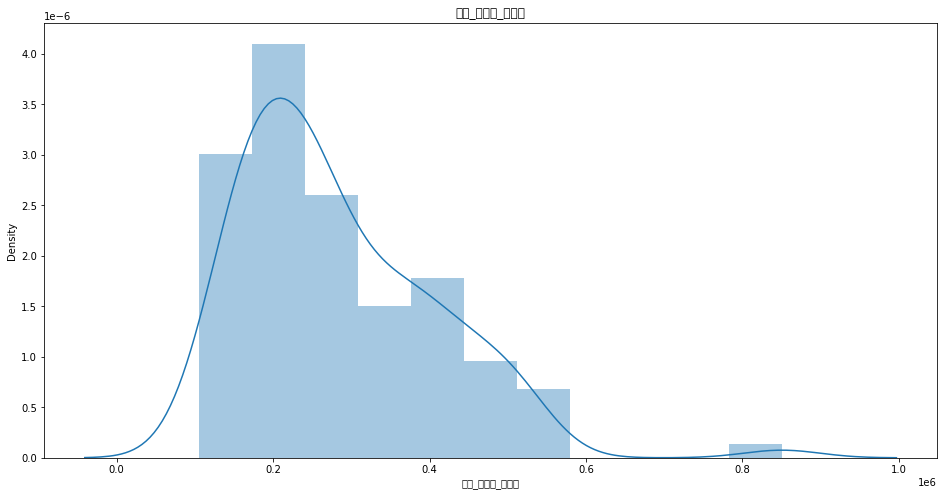

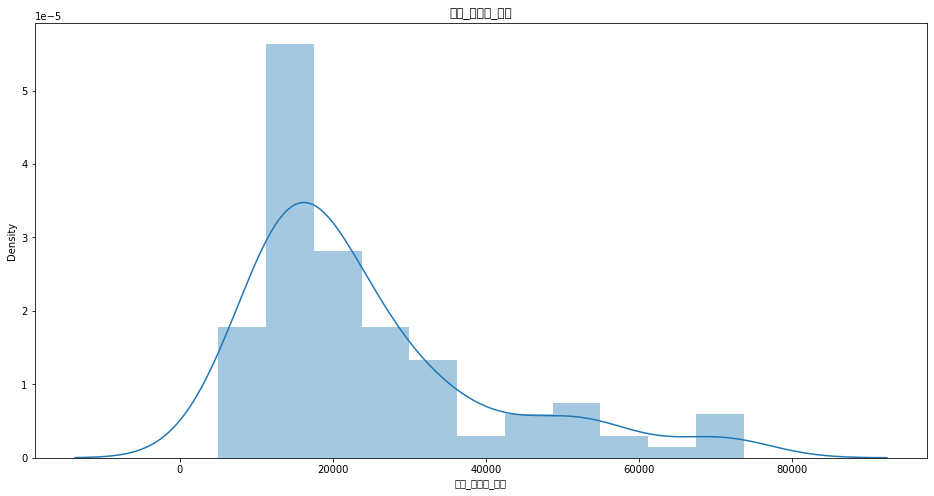

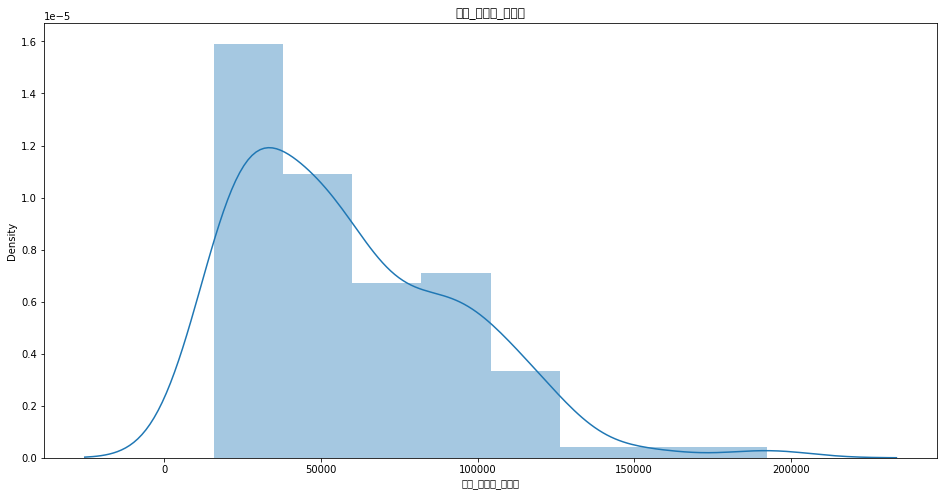

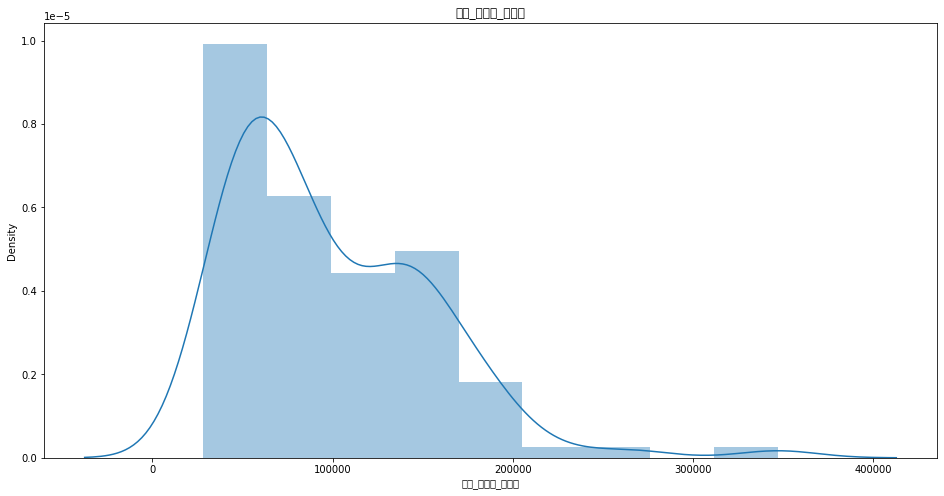

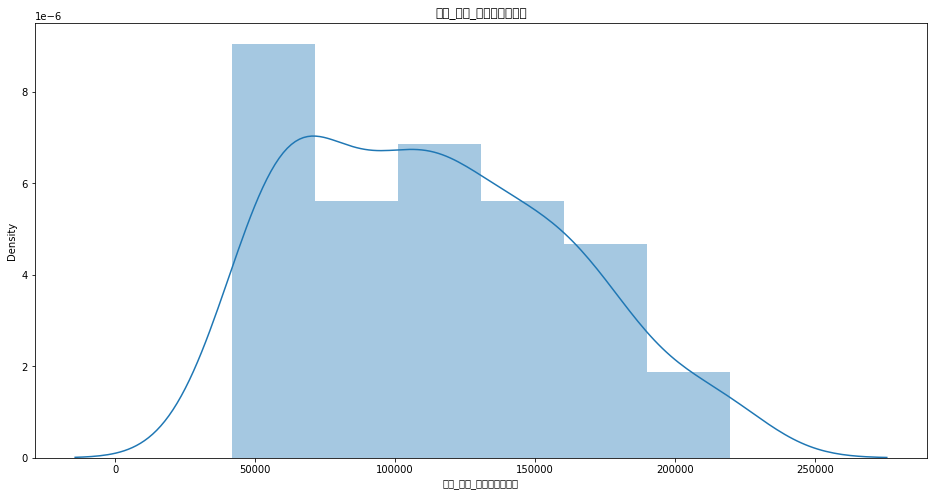

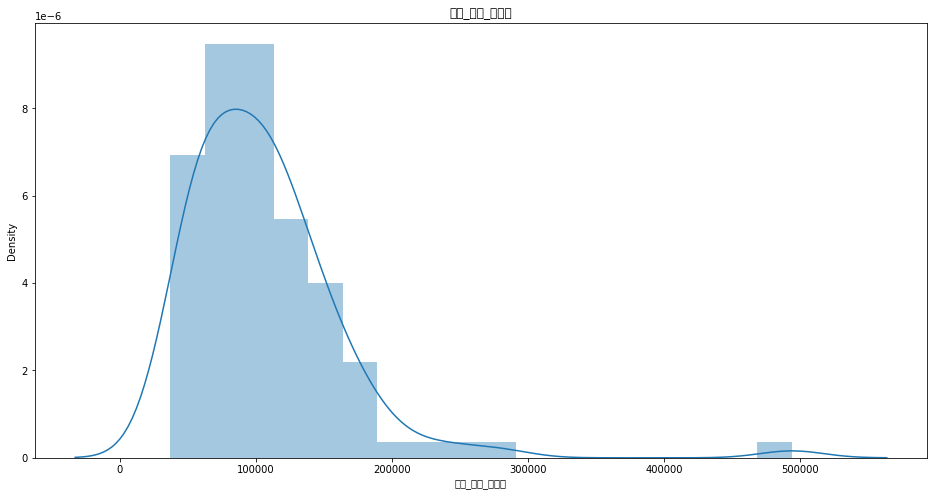

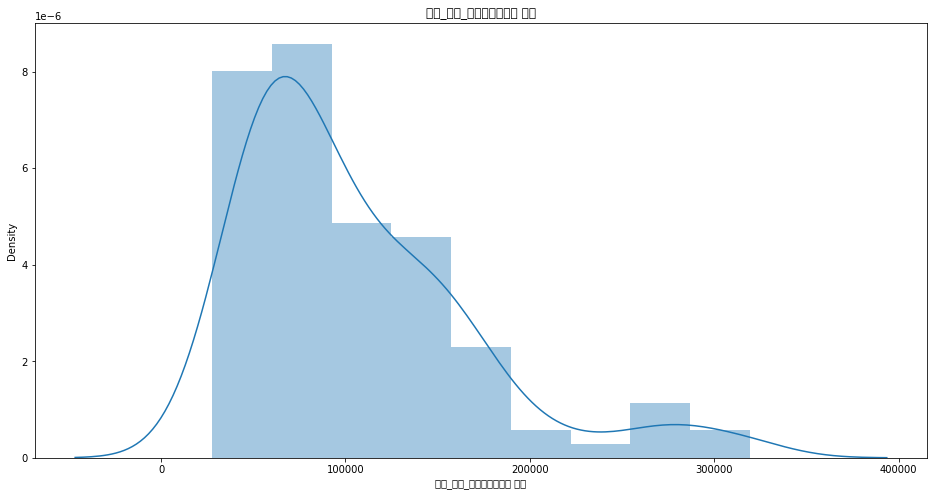

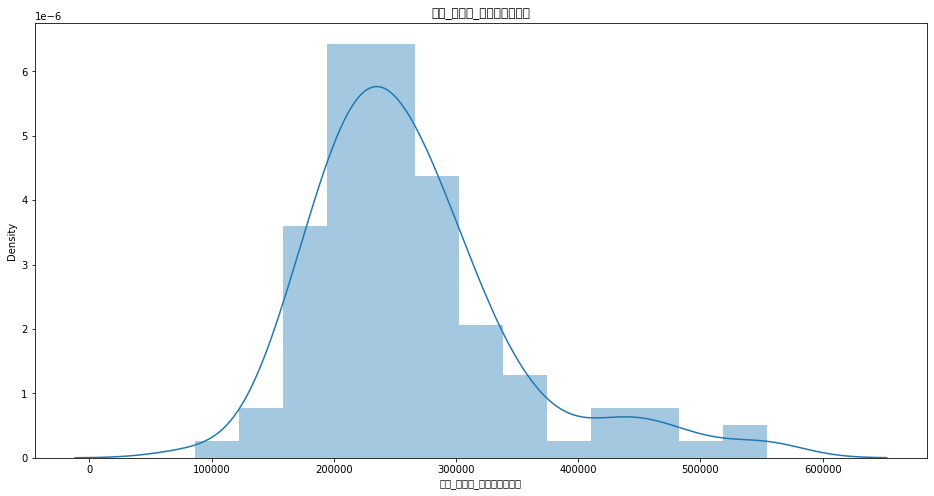

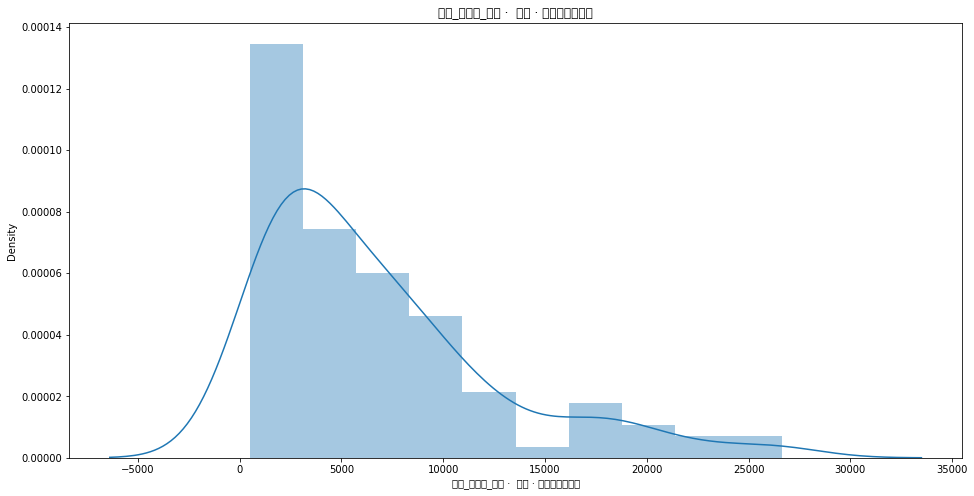

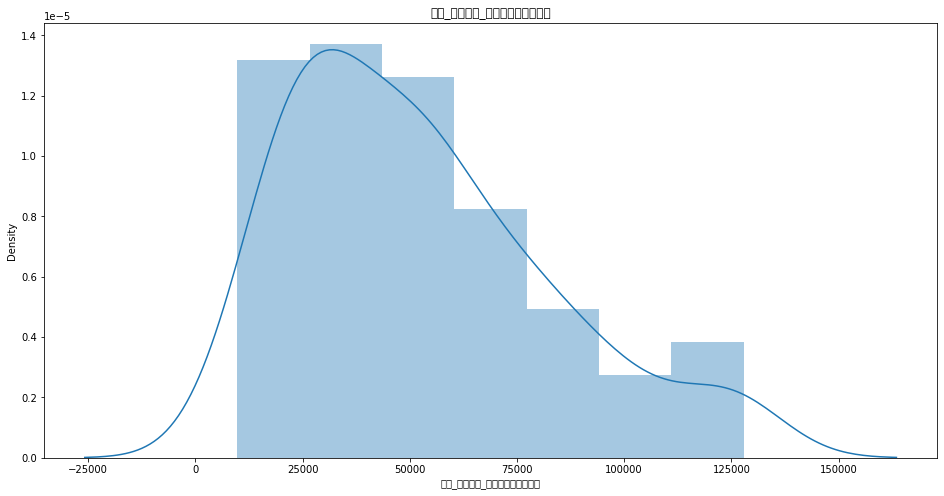

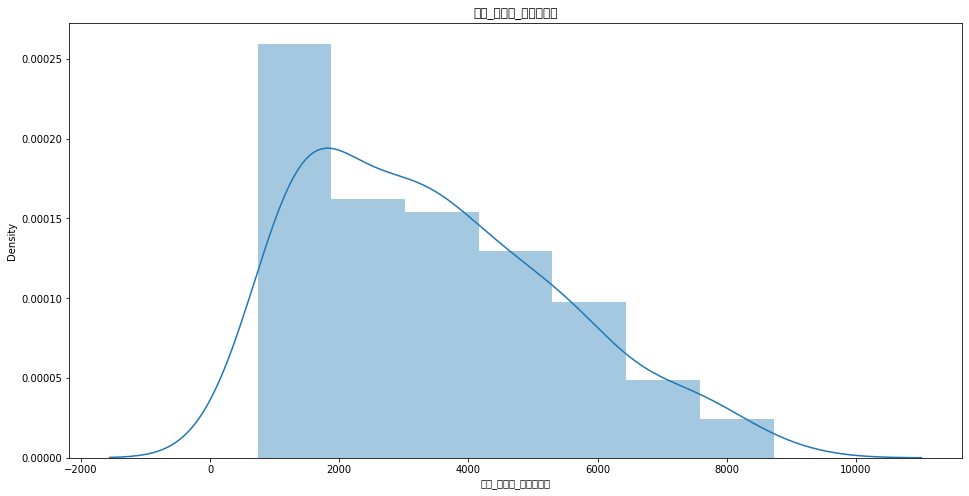

In [6]:
# target변수가 정규분포를 따르는지 확인해 보자.
# 몇 개의 target을 제외하고 정규분포를 따르는 것 같다.
for i in data.loc[:,'서울_종로구_경복궁':].columns:
  plt.figure(figsize = (16,8))
  sns.distplot(data[i])
  plt.title(f'{i}')
  plt.show()

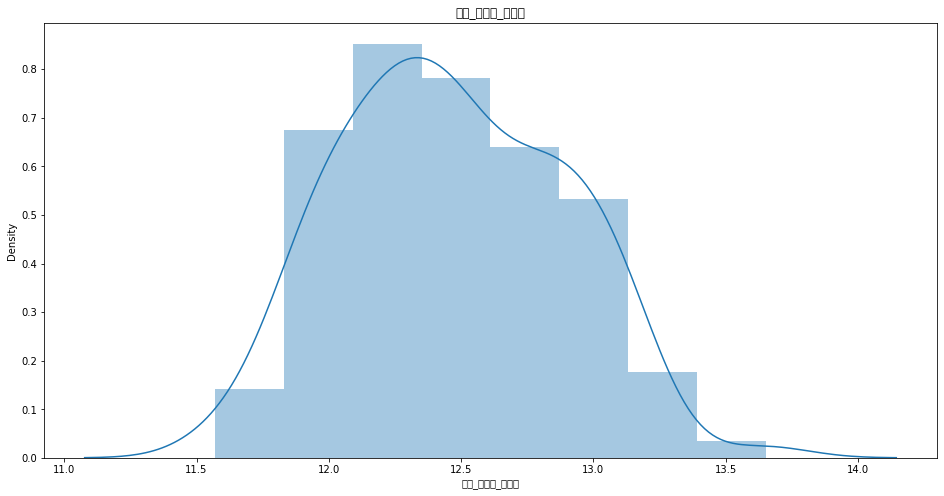

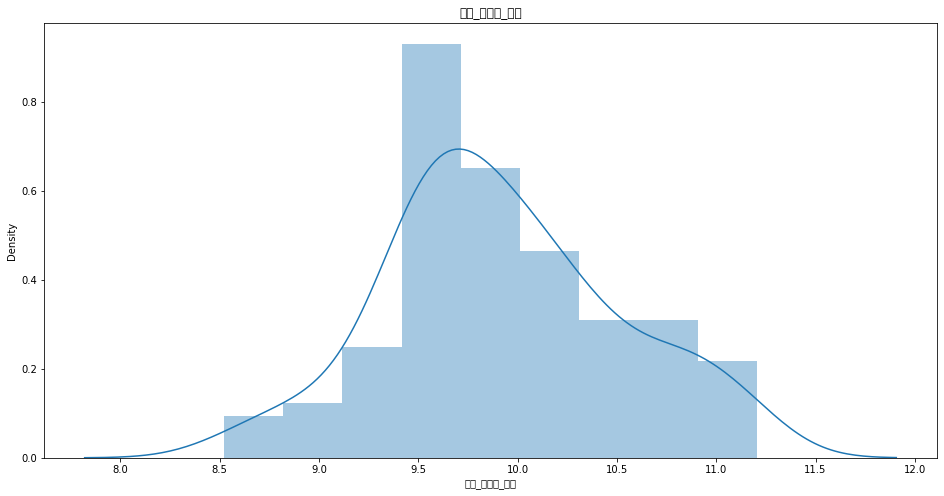

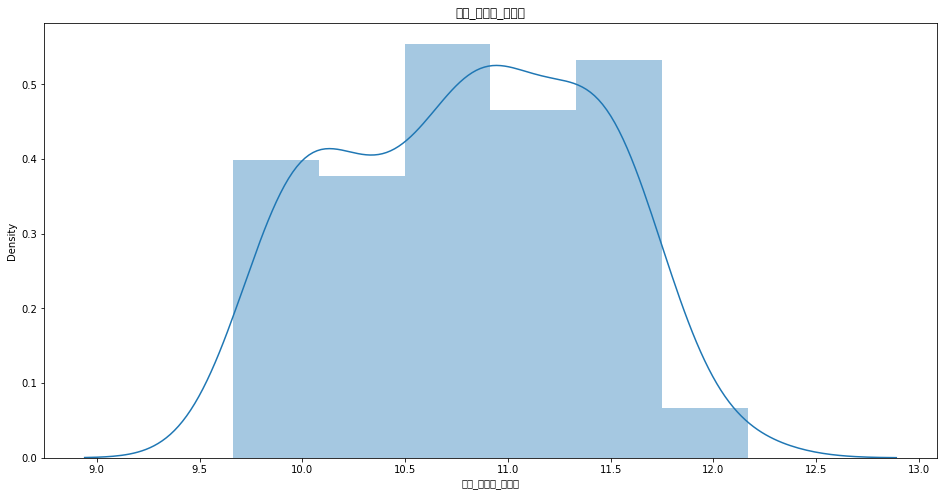

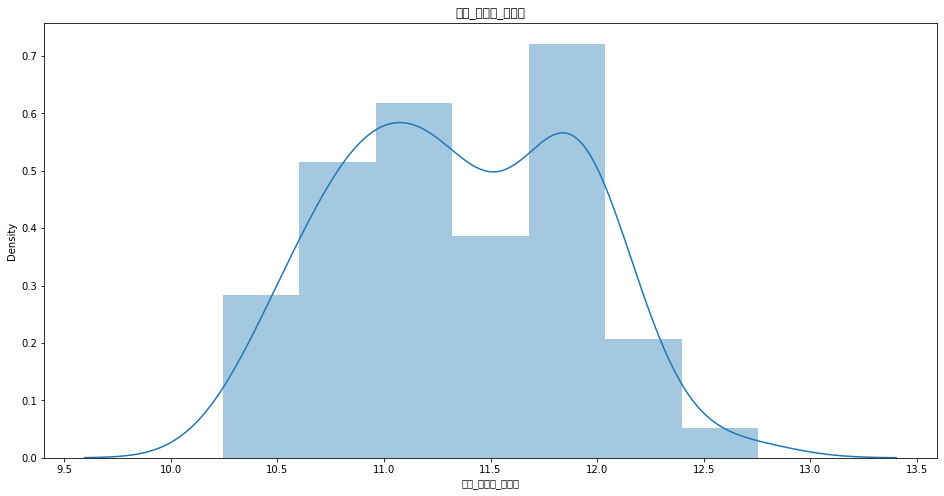

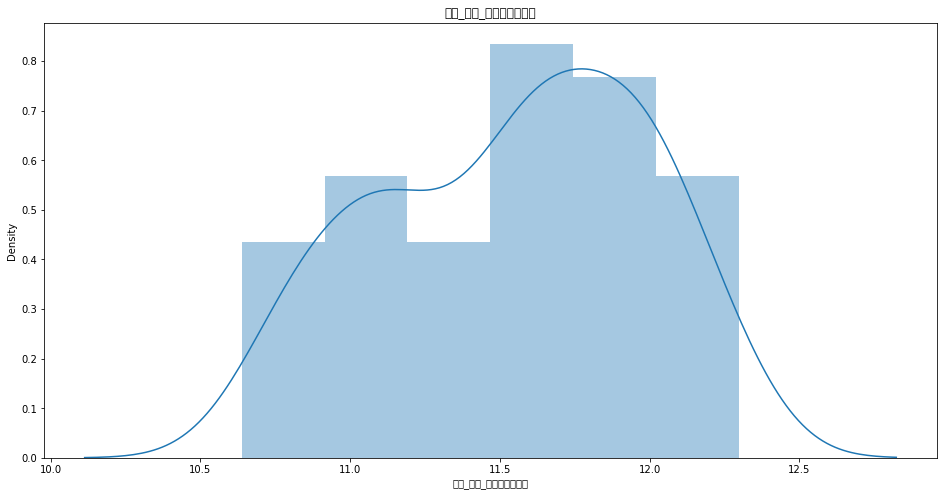

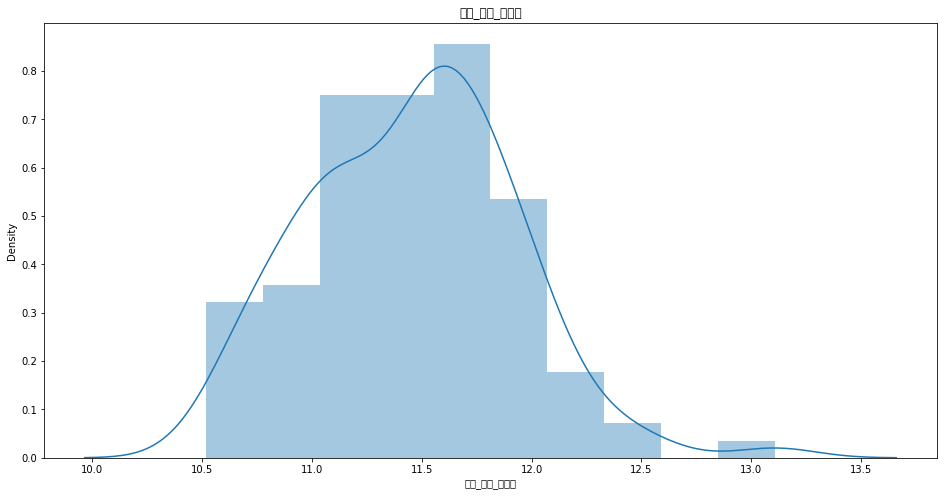

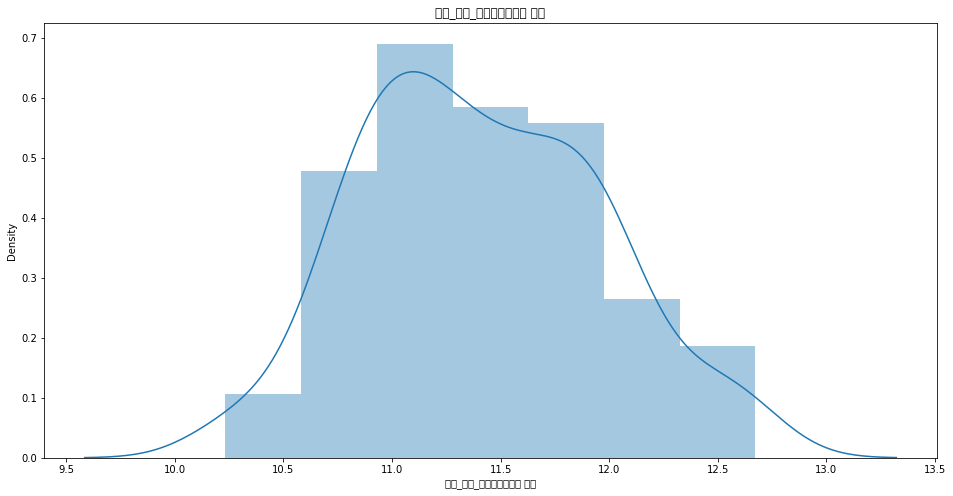

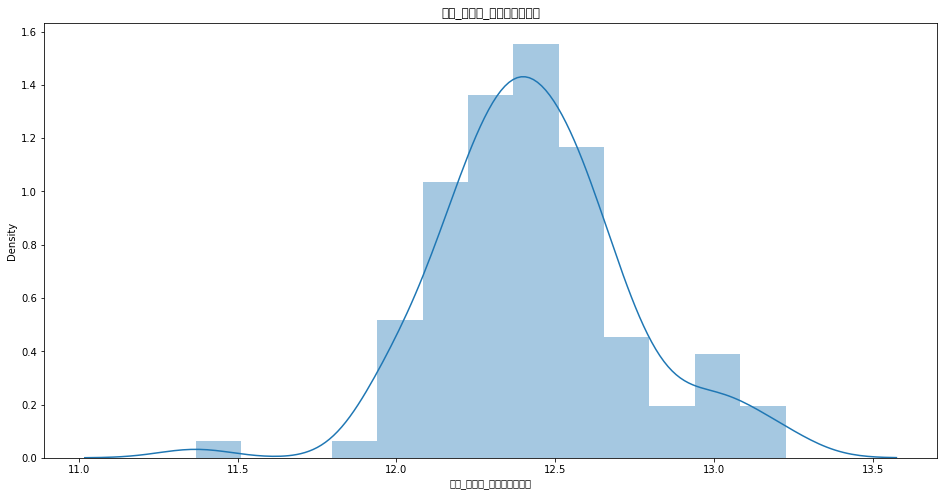

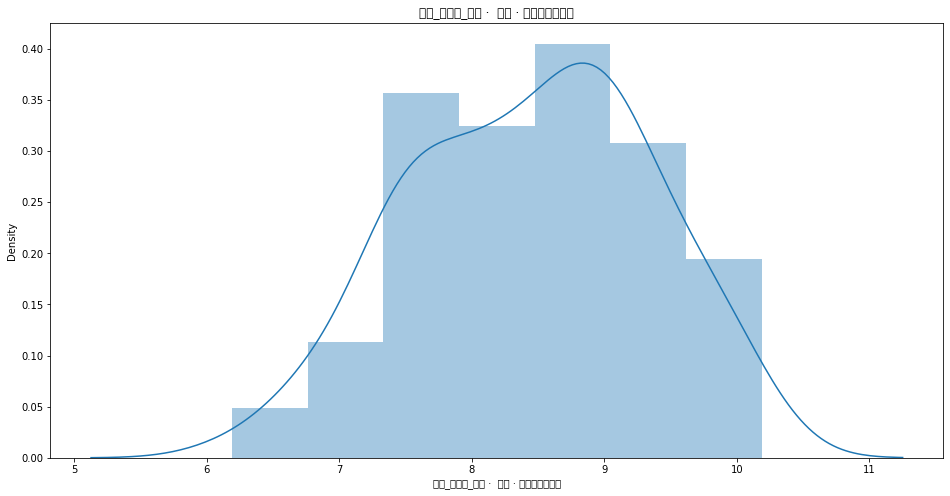

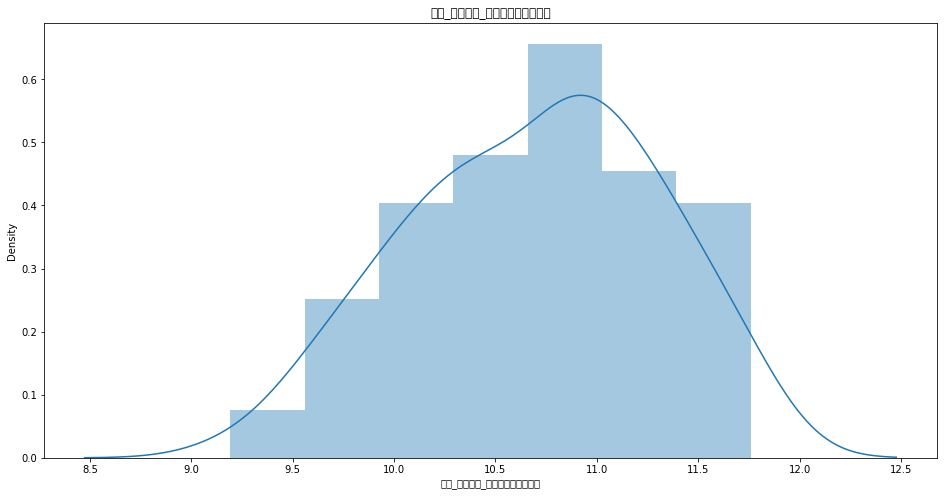

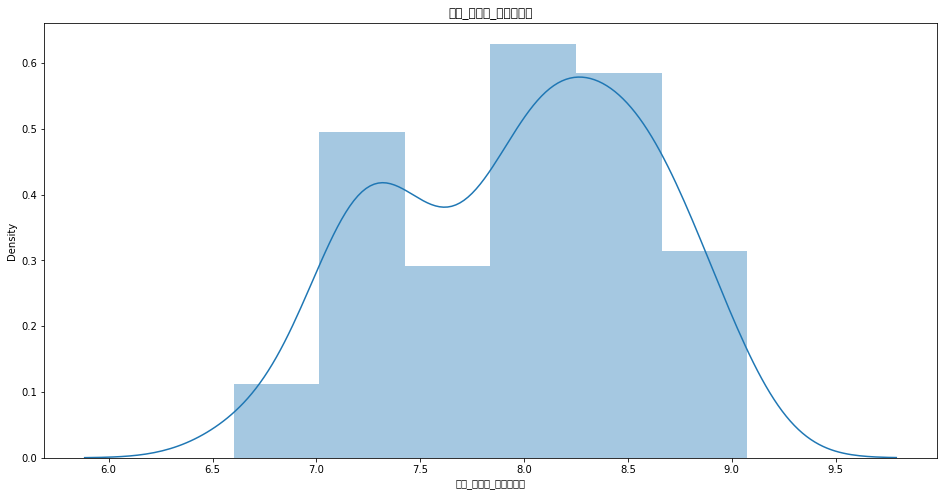

In [7]:
# log를 씌워줌으로써 target이 완전히 정규분포를 따르게 만들어보자.
for i in data.loc[:,'서울_종로구_경복궁':].columns:
  data[i] = data[i].apply(lambda x:np.log1p(x))

# log를 씌운 데이터를 가지고 그래프를 그려보자.
for i in data.loc[:,'서울_종로구_경복궁':].columns:
  plt.figure(figsize = (16,8))
  sns.distplot(data[i])
  plt.title(f'{i}')
  plt.show()


## 다른 feature들을 target변수와 비교해보기

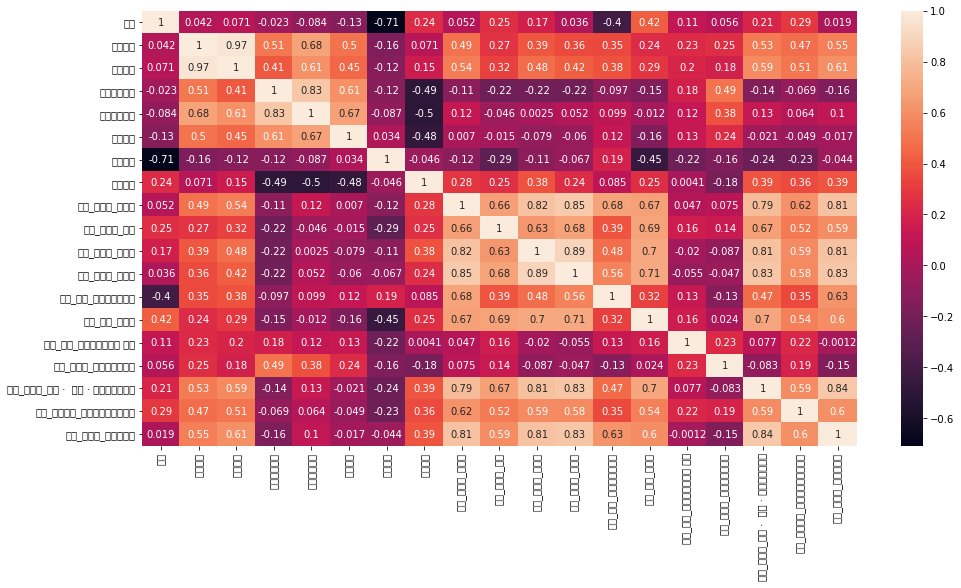

In [8]:
# 상관계수를 확인해 보면서 분석을 어떻게 진행할지 확인해 보자.
data_corr = data.corr()
plt.figure(figsize = (16,8))
sns.heatmap(data_corr, annot = True)

In [9]:
# 상관게수를 살펴보면 서울_마포구_트릭아이미술관과 서울_중구_서울시립미술관과 국립중앙박물관이 증가하고 나머지는 감소하는 것을 확인할 수 있다.
# 그리고 반대로 조선왕릉 전시관이 오르면 시립미술관과 국립중앙박물관이 조금 오르거나 아니면 내리는 경향이 있다.
# 그러면 실내와 실외로 구분해서 분석을 진행한다면 분석에 용이할 것이라고 확인된다.

# 1. 가정: 실내와 실외를 기준으로 feature의 중요도가 다를 것이라고 확인된다.
# 먼저 우리가 알고 있는 기온에 따른 관광지에 영향이 있는지 없는지를 확인해 보자.

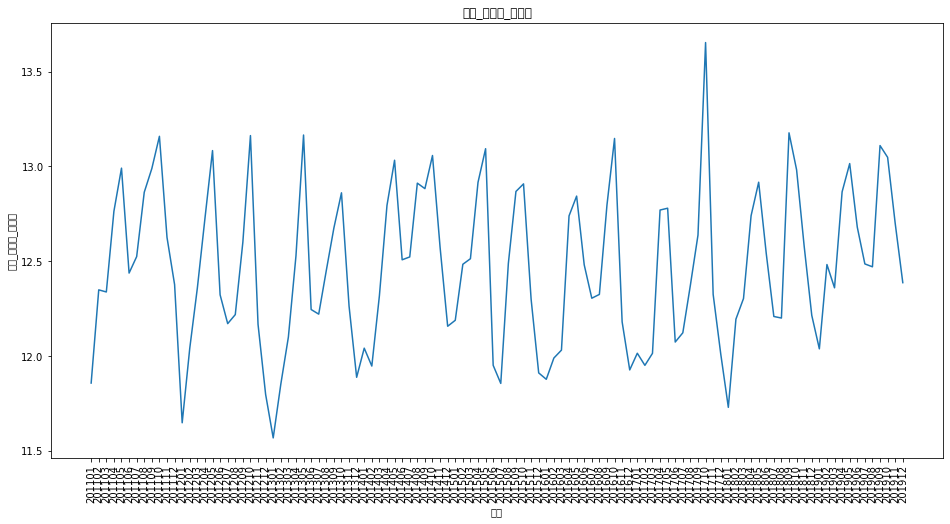

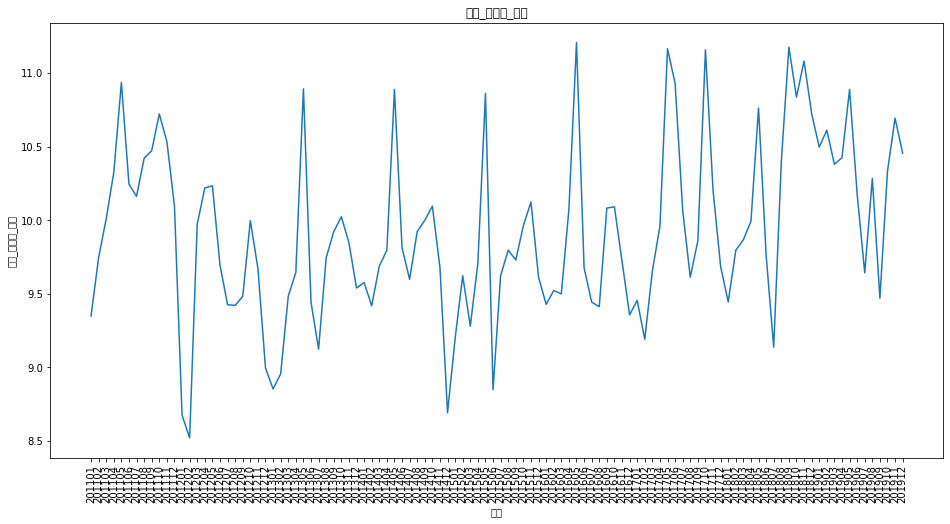

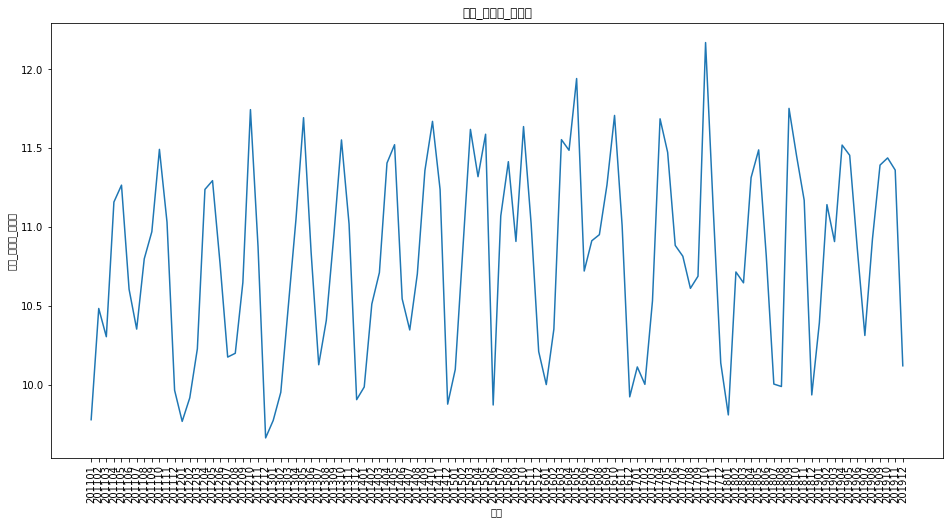

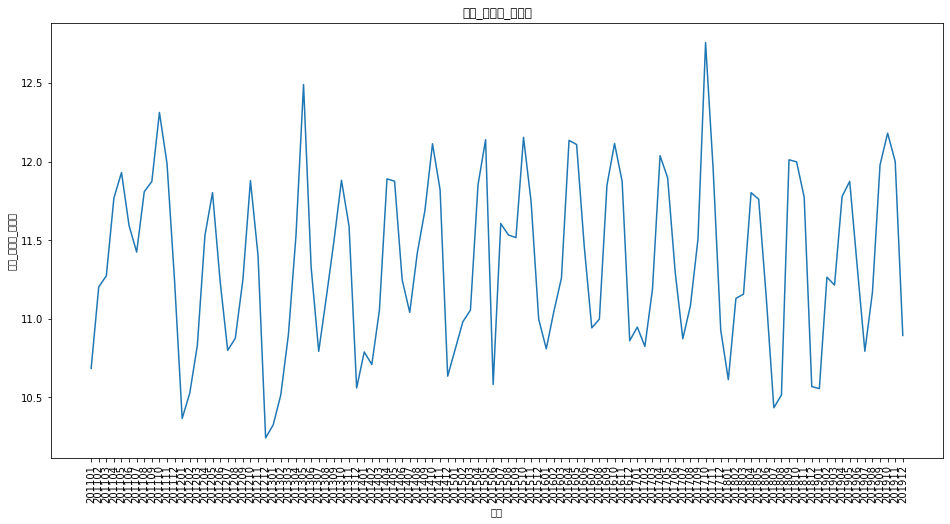

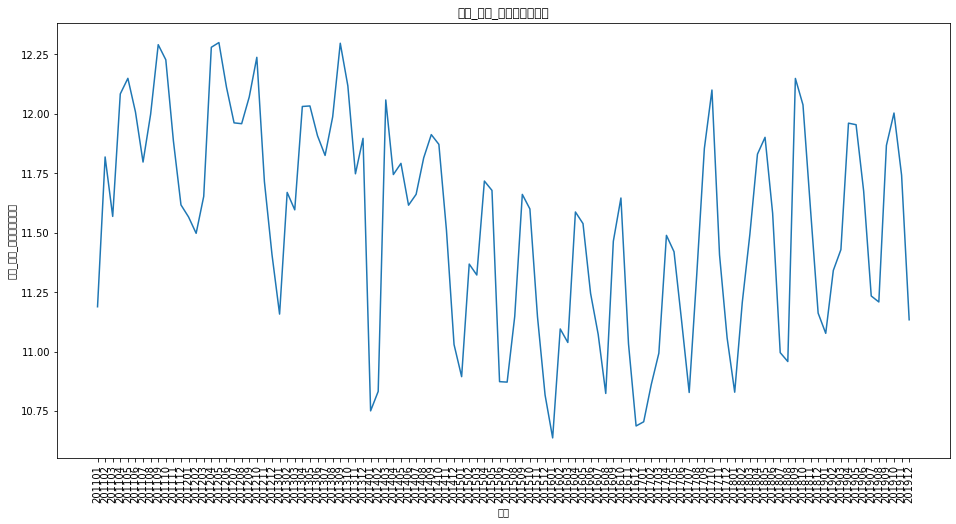

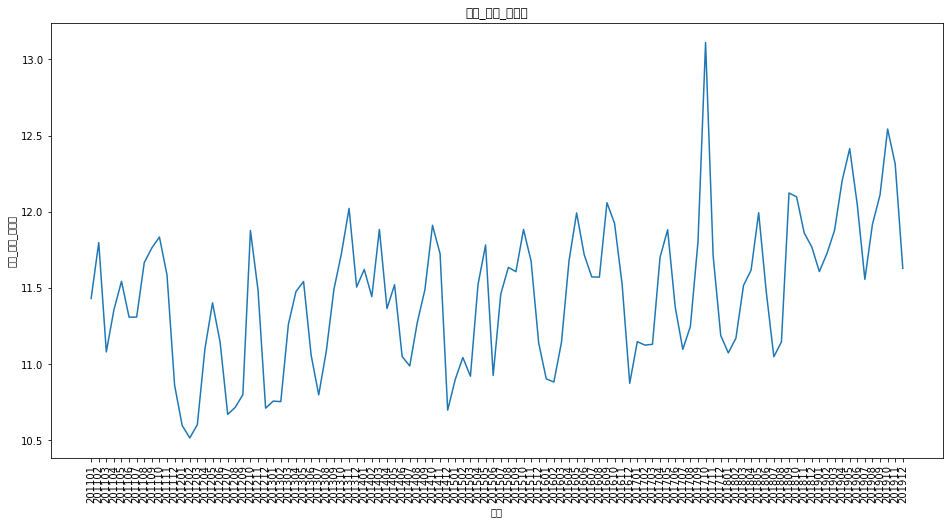

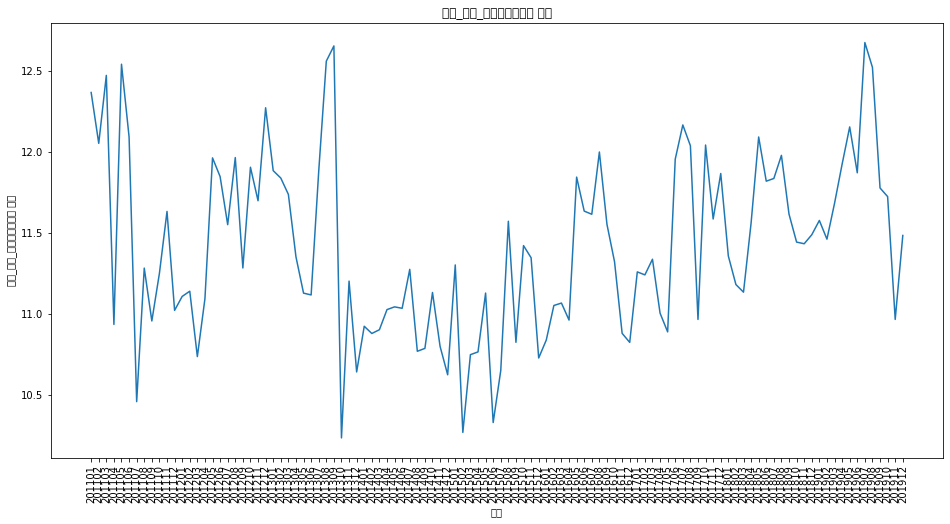

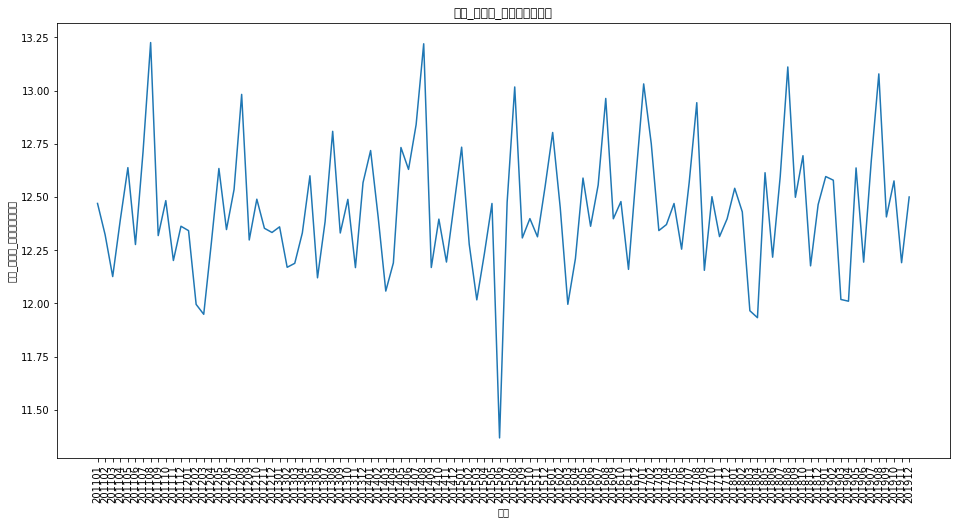

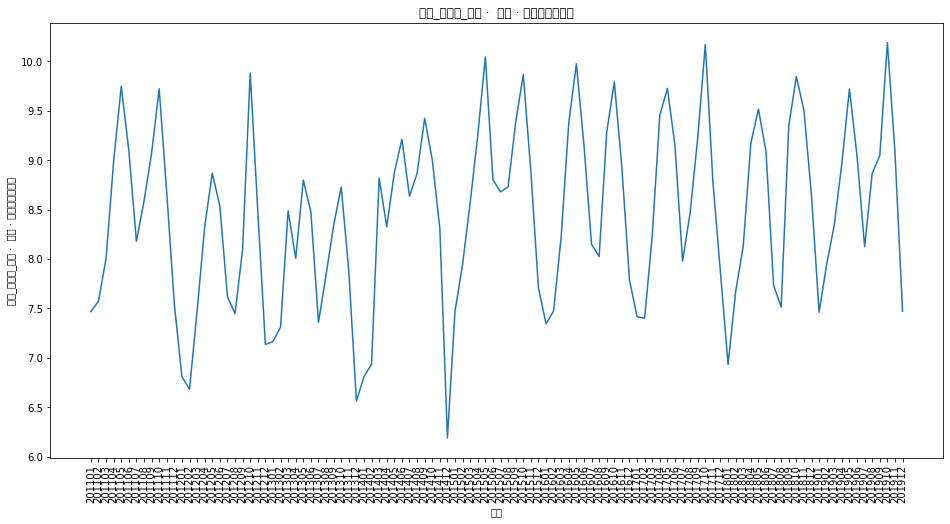

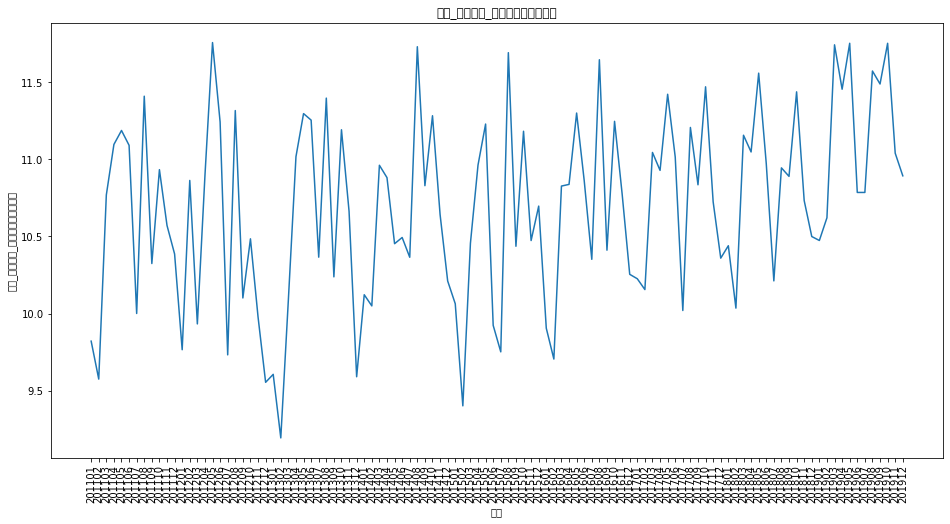

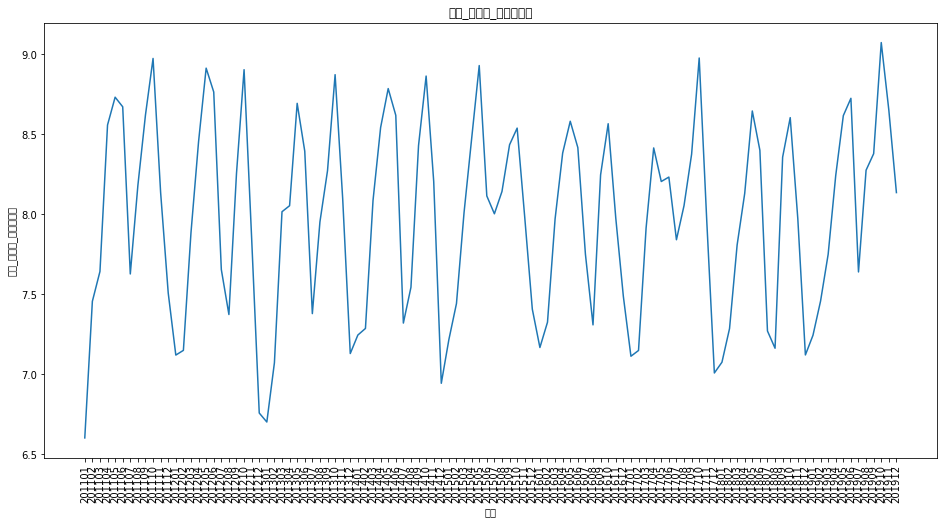

In [10]:
# lineplot 을 그려보도록 하자.
data['일시'] = data['일시'].astype('str')

# 실내와 실외의 차이가 심하고 관광지별로 주기성을 띄고 있다고 판단한다.\
for i in data.loc[:,'서울_종로구_경복궁':].columns:
  plt.figure(figsize = (16,8))
  sns.lineplot(data =data, x = '일시', y = i)
  plt.xticks(rotation=90)
  plt.title(f'{i}')
  plt.show()

# 년, 달, 계절의 변수 만들어주기.

In [11]:
def datetime(data):
  data['year'] = data['일시'].apply(lambda x: x[:4])
  data['month'] = data['일시'].apply(lambda x: x[4:])
  for i in data.index:
    if data.loc[i,'month'] in ['02','12','01']:
      data.loc[i,'weather'] = '겨울'
    elif data.loc[i,'month'] in ['03','04','05']:
      data.loc[i,'weather'] = '봄'
    elif data.loc[i,'month'] in ['06','07','08']:
      data.loc[i,'weather'] = '여름'
    else:
      data.loc[i,'weather'] = '가을'
  return data

data = datetime(data)

# 서울_종로구_경복궁

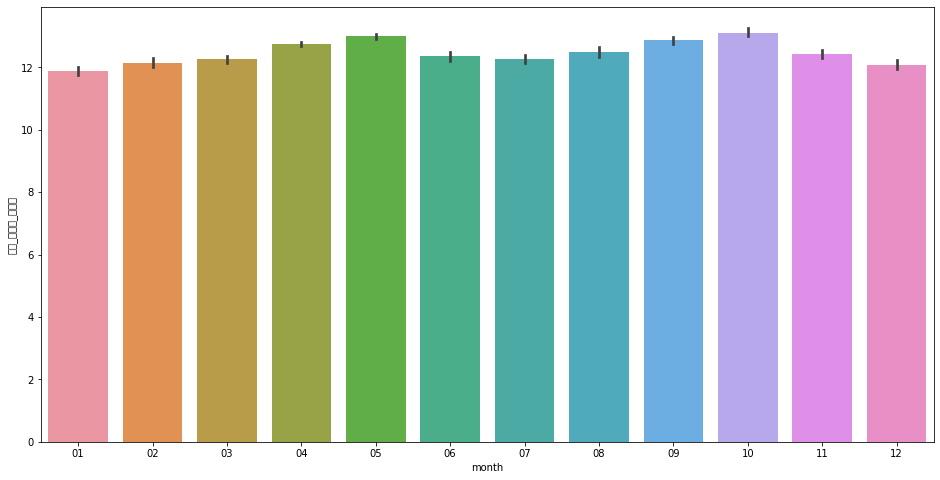

In [12]:
# 월별로 차이가 있는지 확인해보자.
plt.figure(figsize = (16,8))
sns.barplot(data = data, x = 'month', y = '서울_종로구_경복궁')

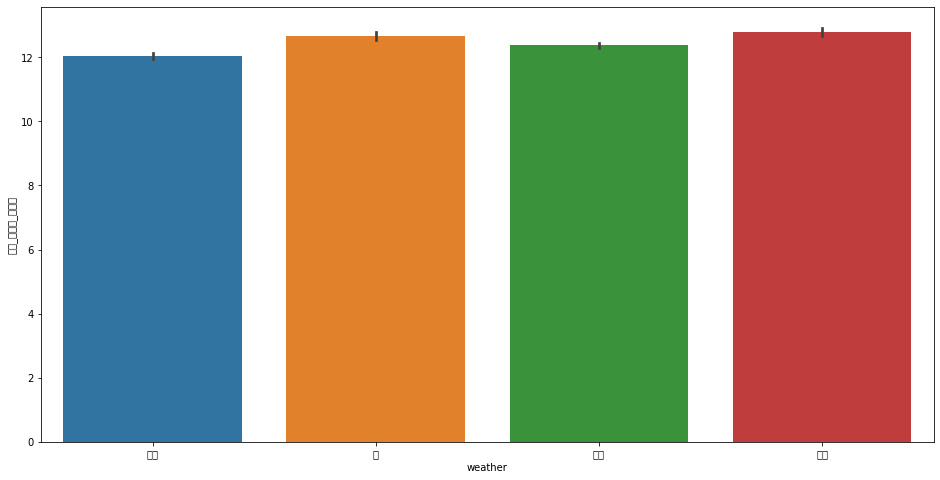

In [13]:
# 계절별로 차이가 있는지 확인해보자.
plt.figure(figsize = (16,8))
sns.barplot(data = data, x = 'weather', y = '서울_종로구_경복궁')

# 가을과 봄에 가장 많은 관광객이 방문하고 추운 겨울날에는 가장 적은 관광객이 온다.

# 기온에 관하여 EDA 해보기

Text(0.5, 1.0, '평균기온의 boxenplot')

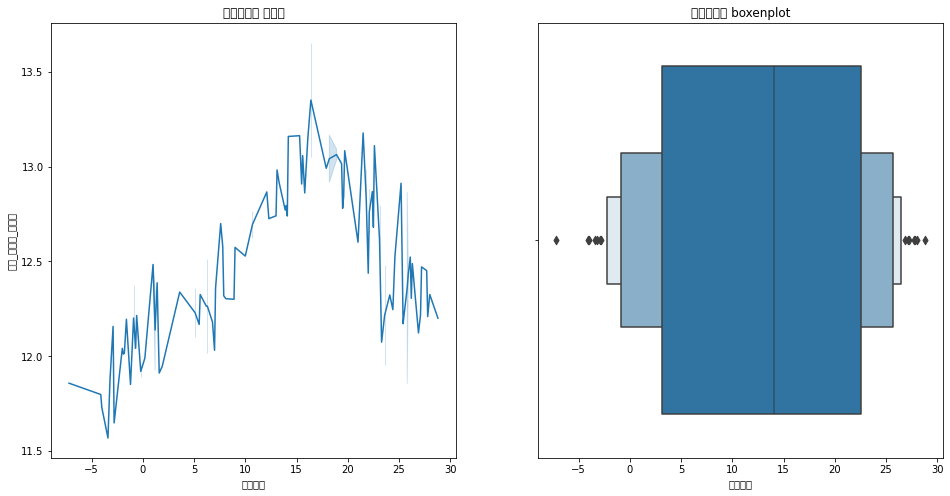

In [14]:
# 평균기온
# 봄과 가을의 날씨에 관광객이 많아지고 추운 겨울이나 여름에는 관광객의 수가 줄어드는 경향이 있다.
fig, ax  = plt.subplots(ncols = 2, figsize = (16,8))
sns.lineplot(data = data, x  = '평균기온', y = '서울_종로구_경복궁', ax = ax[0])
sns.boxenplot(data['평균기온'], ax = ax[1])
ax[0].set_title('평균기온과 경복궁')
ax[1].set_title('평균기온의 boxenplot')

Text(0.5, 1.0, '최고기온의 boxenplot')

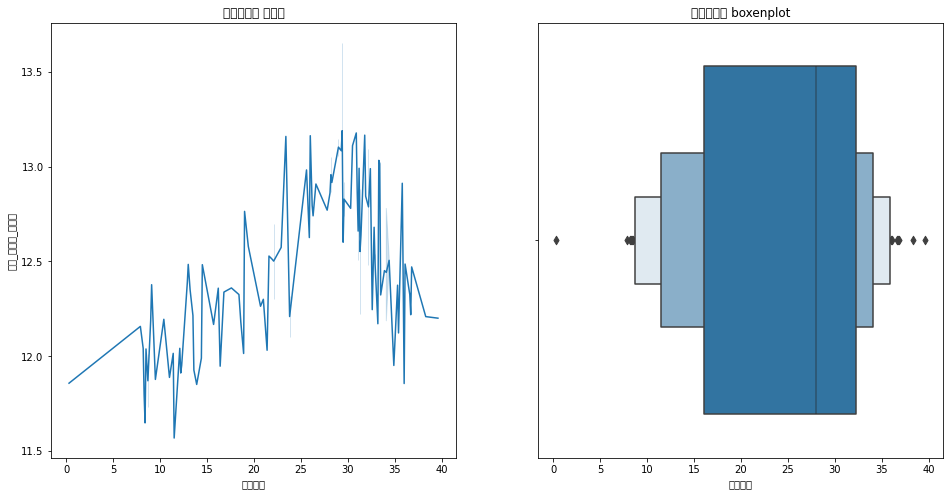

In [15]:
# 최고기온
# 최고기온의 경우 25~30에 가장 많은 관광객이 방문하는 것으로 보인다. 그리고 겨울이나 완전 여름인 날씨에는 다시 줄어드는 경향이 있다.
fig, ax  = plt.subplots(ncols = 2, figsize = (16,8))
sns.lineplot(data = data, x  = '최고기온', y = '서울_종로구_경복궁', ax = ax[0])
sns.boxenplot(data['최고기온'], ax = ax[1])
ax[0].set_title('최고기온과 경복궁')
ax[1].set_title('최고기온의 boxenplot')

# 습도에 관한 EDA

Text(0.5, 1.0, '최저상대습도 boxenplot')

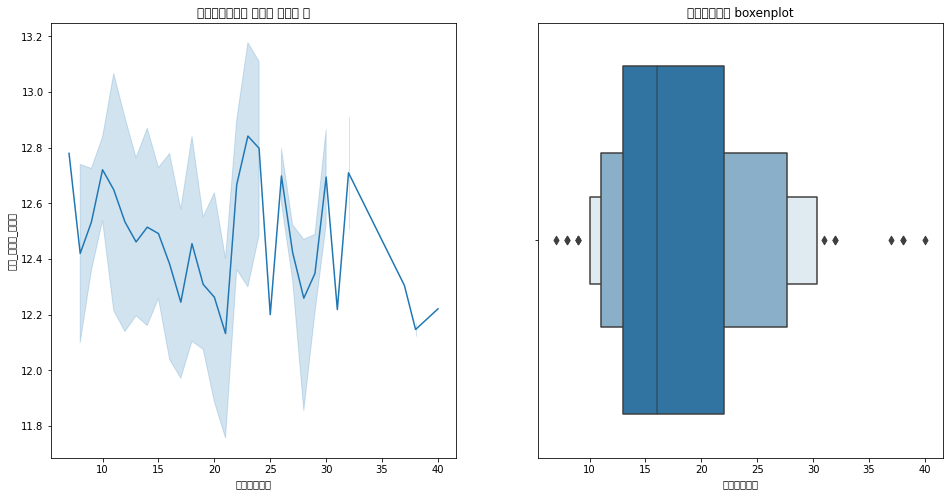

In [16]:
# 최저상대습도로 관광객 수 확인해보기
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.lineplot(data = data, x = '최저상대습도', y = '서울_종로구_경복궁', ax = ax[0])
sns.boxenplot(data['최저상대습도'], ax = ax[1])
ax[0].set_title('최저상대습도별 경복궁 관광객 수')
ax[1].set_title('최저상대습도 boxenplot')

Text(0.5, 1.0, '평균상대습도 boxenplot')

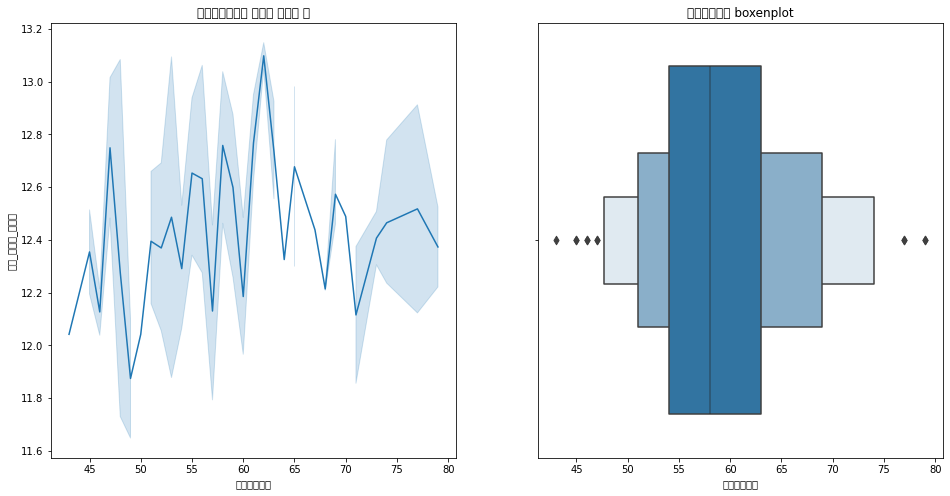

In [17]:
# 평균상대습도로 관광객 수 확인해보기
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.lineplot(data = data, x = '평균상대습도', y = '서울_종로구_경복궁', ax = ax[0])
sns.boxenplot(data['평균상대습도'], ax = ax[1])
ax[0].set_title('평균상대습도별 경복궁 관광객 수')
ax[1].set_title('평균상대습도 boxenplot')

# 강수량에 관한 EDA

Text(0.5, 1.0, '총강수량 distplot')

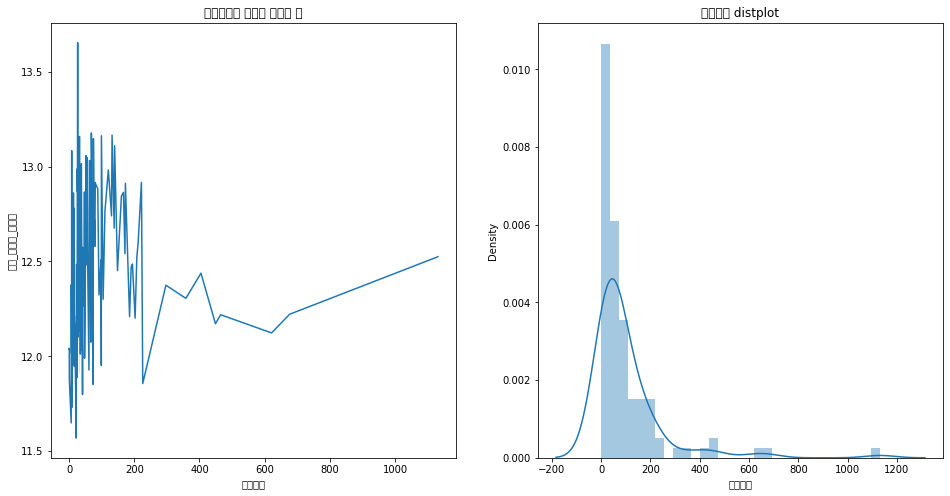

In [18]:
# 강수량이랑 관광객 수 확인해보기
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.lineplot(data = data, x = '총강수량', y = '서울_종로구_경복궁', ax = ax[0])
sns.distplot(data['총강수량'], ax = ax[1])
ax[0].set_title('총강수량별 경복궁 관광객 수')
ax[1].set_title('총강수량 distplot')

# 평균풍속

Text(0.5, 1.0, '평균풍속 distplot')

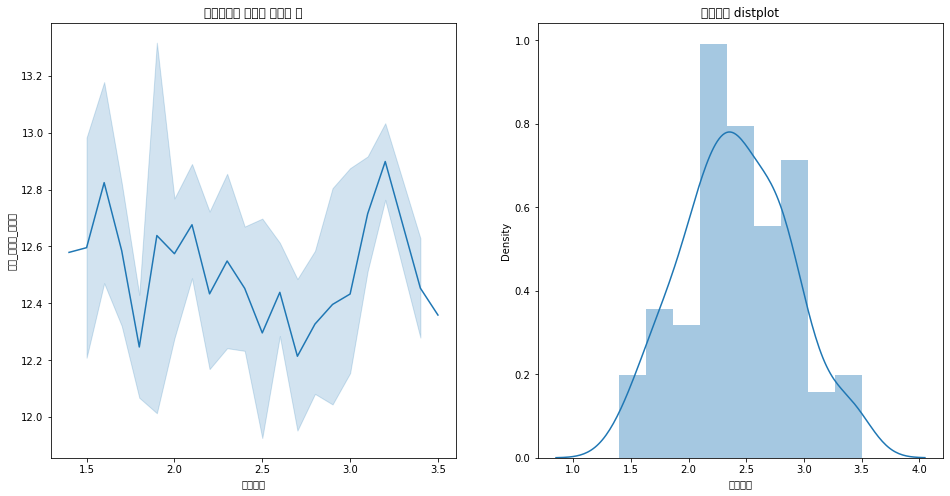

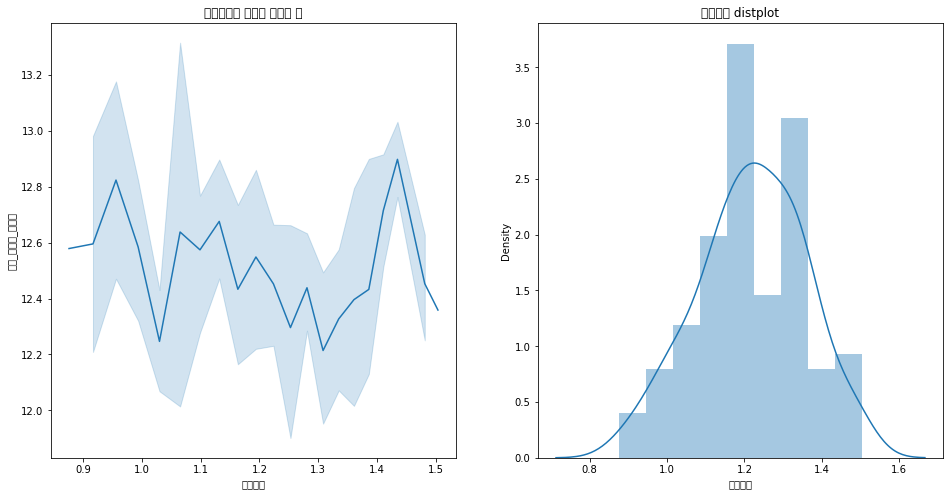

In [19]:
# 평균풍속과 관광객 수 확인해보기
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.lineplot(data = data, x = '평균풍속', y = '서울_종로구_경복궁', ax = ax[0])
sns.distplot(data['평균풍속'], ax = ax[1])
ax[0].set_title('평균풍속별 경복궁 관광객 수')
ax[1].set_title('평균풍속 distplot')

# log를 씌워서 정규분포를 만들어 주자.
data['평균풍속'] = data['평균풍속'].apply(lambda x: np.log1p(x))

# 다시 그래프로 확인해 보기
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.lineplot(data = data, x = '평균풍속', y = '서울_종로구_경복궁', ax = ax[0])
sns.distplot(data['평균풍속'], ax = ax[1])
ax[0].set_title('평균풍속별 경복궁 관광객 수')
ax[1].set_title('평균풍속 distplot')

# 일조시간

Text(0.5, 1.0, '일조시간 distplot')

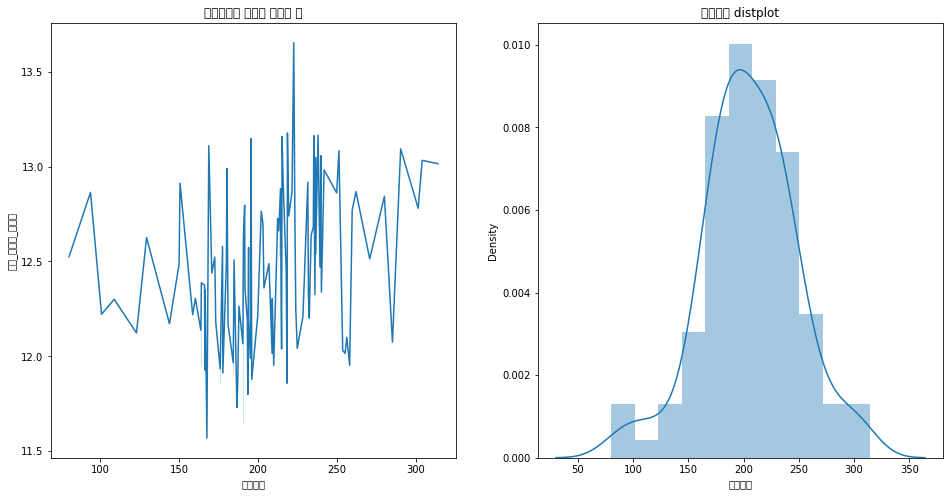

In [20]:
# 일조시간과 관광객 수 확인해보기
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.lineplot(data = data, x = '일조시간', y = '서울_종로구_경복궁', ax = ax[0])
sns.distplot(data['일조시간'], ax = ax[1])
ax[0].set_title('일조시간별 경복궁 관광객 수')
ax[1].set_title('일조시간 distplot')

In [21]:
# 경복궁의 데이터만 가지고 분석을 진행하자
final_data = data[['일시', '평균기온', '최고기온', '최저상대습도', '평균상대습도', '총강수량', '평균풍속', '일조시간','서울_종로구_경복궁','year','month','weather']]
final_data = final_data.rename(columns = {'서울_종로구_경복궁':'target'})

In [22]:
final_data.head()

,일시,평균기온,최고기온,최저상대습도,평균상대습도,총강수량,평균풍속,일조시간,target,year,month,weather
0,201101,-7.2,0.3,19,54,8.9,1.335001,218.5,11.857819,2011,01,겨울
1,201102,1.2,13.2,15,55,29.1,1.280934,166.6,12.349372,2011,02,겨울
2,201103,3.6,16.8,12,51,14.6,1.481605,240.2,12.338315,2011,03,봄
3,201104,10.7,19.0,10,54,110.1,1.435085,202.1,12.763884,2011,04,봄
4,201105,17.9,31.2,15,57,53.4,1.335001,180.4,12.991270,2011,05,봄


Text(0.5, 1.0, '계절별 target')

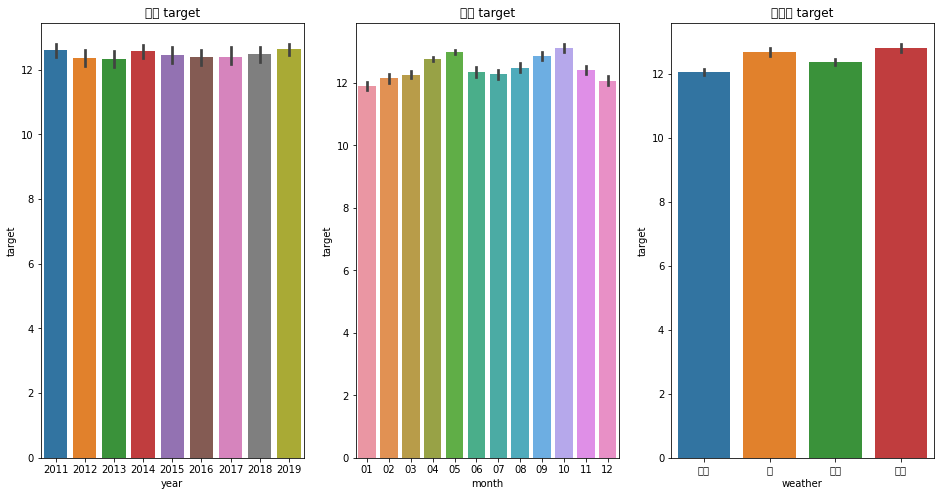

In [23]:
fig, ax = plt.subplots(ncols = 3, figsize = (16,8))
sns.barplot(data = final_data, x = 'year', y = 'target', ax = ax[0])
sns.barplot(data = final_data, x = 'month', y = 'target', ax = ax[1])
sns.barplot(data = final_data, x = 'weather', y = 'target', ax = ax[2])
ax[0].set_title('년별 target')
ax[1].set_title('월별 target')
ax[2].set_title('계절별 target')

# Statsmodel

In [24]:
len(data[['서울_종로구_경복궁', '서울_종로구_종묘', '서울_종로구_창경궁', '서울_종로구_창덕궁', '서울_중구_남산골한옥마을',
       '서울_중구_덕수궁', '서울_중구_서울시립미술관 본관', '서울_용산구_국립중앙박물관',
       '서울_노원구_태릉 ·  강릉 · 조선왕릉전시관', '서울_서대문구_서대문형무소역사관',
       '서울_서초구_헌릉ㆍ인릉']].columns)

11

In [25]:
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
data['weather'] = label.fit_transform(data['weather'])

for i in ['year','month']:
  data[i] = data[i].astype('int')

X = sm.add_constant(data[['평균기온','최고기온','최저상대습도','평균상대습도','총강수량','평균풍속','일조시간','year','month','weather']])
y = data['서울_종로구_경복궁']

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             서울_종로구_경복궁   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     14.86
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           1.09e-15
Time:                        08:47:13   Log-Likelihood:                -8.3280
No. Observations:                 108   AIC:                             38.66
Df Residuals:                      97   BIC:                             68.16
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2214     34.089      0.006      0.9

# Modeling

In [26]:
!pip install catboost

     |████████████████████████████████| 69.2MB 68kB/s 


In [27]:
data['일시'] = data['일시'].astype('int')
train = data[data['일시'] <= 201712]
test = data[data['일시'] > 201712]

X_train, y_train = train[['평균기온','최고기온','최저상대습도','평균상대습도','총강수량','평균풍속','일조시간','year','month','weather']], train['서울_종로구_경복궁']
X_test, y_test = test[['평균기온','최고기온','최저상대습도','평균상대습도','총강수량','평균풍속','일조시간','year','month','weather']], test['서울_종로구_경복궁']

X_train = pd.get_dummies(X_train, columns = ['weather','month'])
X_test = pd.get_dummies(X_test, columns = ['weather','month'])

X_train = X_train.drop('year', axis = 1)
X_test = X_test.drop('year', axis = 1)

In [28]:
X_train.head()

,평균기온,최고기온,최저상대습도,평균상대습도,총강수량,평균풍속,일조시간,weather_0,weather_1,weather_2,weather_3,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,-7.2,0.3,19,54,8.9,1.335001,218.5,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1.2,13.2,15,55,29.1,1.280934,166.6,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3.6,16.8,12,51,14.6,1.481605,240.2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,10.7,19.0,10,54,110.1,1.435085,202.1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
4,17.9,31.2,15,57,53.4,1.335001,180.4,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [29]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor 
models = {'lightgbm':LGBMRegressor(random_state = 42), 'xgboost':XGBRegressor(random_state = 42),'catboost': CatBoostRegressor(random_state = 42),'lr': LinearRegression(),'ridge': Ridge(random_state = 42),'lasso': Lasso(),'rfg':RandomForestRegressor()}
model_rmse = {}
for i,j in models.items():
  model = j
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  y_pred = np.exp(y_pred) - 1
  model_test = y_test.copy()
  model_test = np.exp(model_test)-1
  RMSE = mean_squared_error(model_test, y_pred) ** 0.5

  model_rmse[i] = RMSE

# 가장 좋은 성능을 내는 모델 찾아서 맞추기
print(sorted(model_rmse.items(), key = lambda item:item[1]))

[08:47:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Learning rate set to 0.025114
0:	learn: 0.4190539	total: 47ms	remaining: 47s
1:	learn: 0.4136071	total: 48.1ms	remaining: 24s
2:	learn: 0.4079884	total: 49.1ms	remaining: 16.3s
3:	learn: 0.4024435	total: 50ms	remaining: 12.4s
4:	learn: 0.3979323	total: 51ms	remaining: 10.1s
5:	learn: 0.3922574	total: 51.5ms	remaining: 8.53s
6:	learn: 0.3879016	total: 52.2ms	remaining: 7.4s
7:	learn: 0.3828022	total: 53ms	remaining: 6.57s
8:	learn: 0.3782605	total: 53.9ms	remaining: 5.93s
9:	learn: 0.3732779	total: 54.8ms	remaining: 5.42s
10:	learn: 0.3695761	total: 55.8ms	remaining: 5.02s
11:	learn: 0.3667694	total: 56.5ms	remaining: 4.65s
12:	learn: 0.3633071	total: 57.5ms	remaining: 4.36s
13:	learn: 0.3581215	total: 58.3ms	remaining: 4.11s
14:	learn: 0.3537061	total: 59ms	remaining: 3.88s
15:	learn: 0.3499778	total: 59.9ms	remaining: 3.68s
16:	learn: 0.3458658	total: 60.9ms	r

# 불쾌지수, 여름철 체감온도, 겨울철 체감온도 feature 만들어주기

In [30]:
train['평균상대습도']

0     54
1     55
2     51
3     54
4     57
      ..
79    71
80    61
81    56
82    54
83    56
Name: 평균상대습도, Length: 84, dtype: int64

In [31]:
class final_dataframe:
  # 여름철 체감온도
  def summer_feature(df = None):
    H = df['평균상대습도']
    T = df['평균기온'].apply(lambda x:32 + (1.8 * x))

    temperature = -42.379 + (2.04901523*T) + (10.14333127 * H) - (0.22475541 * T * H) - (6.83783 * (10 ** -3) * (T ** 2)) - (5.481717 * (10 ** -2)*(H**2)) + (1.22874 * (10 ** -3) * (T ** 2) * H) + (8.5282 * (10 ** -4) * T * (H **2)) - (1.99 * (10**-6) * (T**2) * (H**2))    
    df['여름철 체감온도'] = temperature

    return df

  # 겨울철 체감온도
  def winter_feature(df = None):
    T = df['평균기온']
    V = df['평균풍속']

    temperature = 13.12 + (0.6215 * T) - (11.37 * 0.16 ** V) + (0.3965 *V *0.16**T)

    df['겨울철 체감온도'] = temperature
    return df

  # 불쾌지수 구하기
  def 불쾌지수(df = None):
    T = df['평균기온']
    H = df['평균상대습도']
    
    불쾌지수 = (9/5 * T) - (0.55 * (1 - H/100) * ((9/5 * T) - 26)) + 32

    df['불쾌지수'] = 불쾌지수

    return df

  def final_dataframe(df = None):
    df1=final_dataframe.summer_feature(df = df)
    df2=final_dataframe.winter_feature(df = df1)
    df3=final_dataframe.불쾌지수(df = df2)
    return df3

X_train = final_dataframe.final_dataframe(X_train)
X_test = final_dataframe.final_dataframe(X_test)

In [32]:
X_train['불쾌지수'] = pd.cut(X_train['불쾌지수'], bins = [0,68,75,80,200], labels = [0,1,2,3])
X_test['불쾌지수'] = pd.cut(X_test['불쾌지수'], bins = [0,68,75,80,200], labels = [0,1,2,3])

X_train = pd.get_dummies(data = X_train, columns = ['불쾌지수'])
X_test = pd.get_dummies(data = X_test, columns = ['불쾌지수'])

In [33]:
X_train.head()

,평균기온,최고기온,최저상대습도,평균상대습도,총강수량,평균풍속,일조시간,weather_0,weather_1,weather_2,weather_3,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,여름철 체감온도,겨울철 체감온도,불쾌지수_0,불쾌지수_1,불쾌지수_2,불쾌지수_3
0,-7.2,0.3,19,54,8.9,1.335001,218.5,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,220.263363,284493.680453,1,0,0,0
1,1.2,13.2,15,55,29.1,1.280934,166.6,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,149.388194,12.834973,1,0,0,0
2,3.6,16.8,12,51,14.6,1.481605,240.2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,130.476121,14.605572,1,0,0,0
3,10.7,19.0,10,54,110.1,1.435085,202.1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,97.020249,18.950444,1,0,0,0
4,17.9,31.2,15,57,53.4,1.335001,180.4,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,78.479349,23.260250,1,0,0,0


In [34]:
X_test.head()

,평균기온,최고기온,최저상대습도,평균상대습도,총강수량,평균풍속,일조시간,weather_0,weather_1,weather_2,weather_3,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,여름철 체감온도,겨울철 체감온도,불쾌지수_0,불쾌지수_1,불쾌지수_2,불쾌지수_3
84,-4.0,8.7,16,48,8.5,1.064711,186.7,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,179.447623,653.179927,1,0,0,0
85,-1.6,10.4,13,45,29.6,1.163151,194.2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,156.174935,19.431940,1,0,0,0
86,8.1,22.1,13,59,49.5,1.064711,209.1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,108.732933,16.538384,1,0,0,0
87,13.0,26.3,8,55,130.3,1.098612,223.4,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,89.241841,19.681063,1,0,0,0
88,18.2,29.6,22,63,222.0,0.993252,231.6,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,76.850896,22.589463,1,0,0,0


In [35]:
# 여름철 체감온도, 겨울철 체감온도, 불쾌지수를 넣었을 때 statsmodels
X = X_train
y = y_train

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             서울_종로구_경복궁   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     15.18
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           3.50e-17
Time:                        08:47:29   Log-Likelihood:                 31.079
No. Observations:                  84   AIC:                            -16.16
Df Residuals:                      61   BIC:                             39.75
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
평균기온           0.0170      0.040      0.427      0.6

In [36]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(84, 29) (24, 29) (84,) (24,)


In [37]:
# 그래프를 그리기 위한 데이터 만들어주기
train_plot_data = pd.concat([X_train, y_train], axis = 1)
test_plot_data = pd.concat([X_test, y_test], axis= 1)

train_plot_data.head()

,평균기온,최고기온,최저상대습도,평균상대습도,총강수량,평균풍속,일조시간,weather_0,weather_1,weather_2,weather_3,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,여름철 체감온도,겨울철 체감온도,불쾌지수_0,불쾌지수_1,불쾌지수_2,불쾌지수_3,서울_종로구_경복궁
0,-7.2,0.3,19,54,8.9,1.335001,218.5,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,220.263363,284493.680453,1,0,0,0,11.857819
1,1.2,13.2,15,55,29.1,1.280934,166.6,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,149.388194,12.834973,1,0,0,0,12.349372
2,3.6,16.8,12,51,14.6,1.481605,240.2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,130.476121,14.605572,1,0,0,0,12.338315
3,10.7,19.0,10,54,110.1,1.435085,202.1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,97.020249,18.950444,1,0,0,0,12.763884
4,17.9,31.2,15,57,53.4,1.335001,180.4,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,78.479349,23.260250,1,0,0,0,12.991270


In [38]:
train_plot_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 0 to 83
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   평균기온        84 non-null     float64
 1   최고기온        84 non-null     float64
 2   최저상대습도      84 non-null     int64  
 3   평균상대습도      84 non-null     int64  
 4   총강수량        84 non-null     float64
 5   평균풍속        84 non-null     float64
 6   일조시간        84 non-null     float64
 7   weather_0   84 non-null     uint8  
 8   weather_1   84 non-null     uint8  
 9   weather_2   84 non-null     uint8  
 10  weather_3   84 non-null     uint8  
 11  month_1     84 non-null     uint8  
 12  month_2     84 non-null     uint8  
 13  month_3     84 non-null     uint8  
 14  month_4     84 non-null     uint8  
 15  month_5     84 non-null     uint8  
 16  month_6     84 non-null     uint8  
 17  month_7     84 non-null     uint8  
 18  month_8     84 non-null     uint8  
 19  month_9     84 non-null     uin

Text(0.5, 1.0, '겨울철 체감온도 vs target ax X_test')

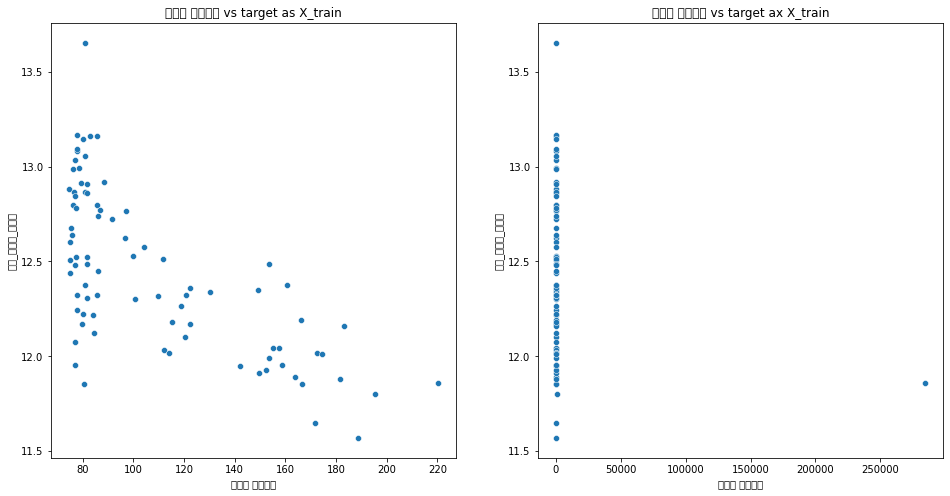

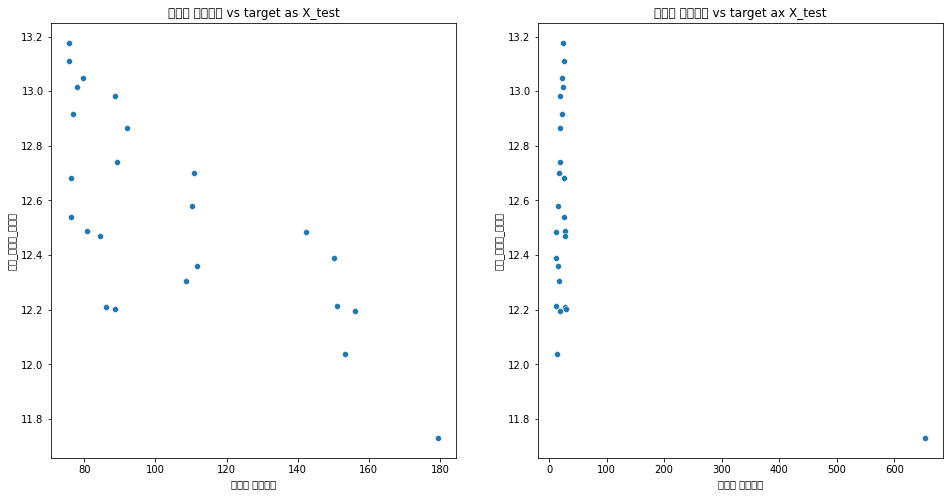

In [39]:
# 여름철 체감온도와 겨울철 체감온도 그래프로 비교해보기
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.scatterplot(data = train_plot_data, x = '여름철 체감온도', y = '서울_종로구_경복궁', ax = ax[0])
sns.scatterplot(data = train_plot_data, x = '겨울철 체감온도', y ='서울_종로구_경복궁', ax = ax[1])
ax[0].set_title('여름철 체감온도 vs target as X_train')
ax[1].set_title('겨울철 체감온도 vs target ax X_train')

fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.scatterplot(data = test_plot_data, x = '여름철 체감온도', y = '서울_종로구_경복궁', ax = ax[0])
sns.scatterplot(data = test_plot_data, x = '겨울철 체감온도', y = '서울_종로구_경복궁', ax = ax[1])
ax[0].set_title('여름철 체감온도 vs target as X_test')
ax[1].set_title('겨울철 체감온도 vs target ax X_test')

In [40]:
# 최고 성능의 모델 찾기
models = {'lightgbm':LGBMRegressor(random_state = 42), 'xgboost':XGBRegressor(random_state = 42),'catboost': CatBoostRegressor(random_state = 42),'lr': LinearRegression(),'ridge': Ridge(random_state = 42),'lasso': Lasso(random_state=42),'rfg':RandomForestRegressor(random_state = 42)}
model_rmse = {}
for i,j in models.items():
  model = j
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  y_pred = np.exp(y_pred) - 1
  model_test = y_test.copy()
  model_test = np.exp(model_test)-1
  RMSE = mean_squared_error(model_test, y_pred) ** 0.5

  model_rmse[i] = RMSE

# 가장 좋은 성능을 내는 모델 찾아서 맞추기
print(sorted(model_rmse.items(), key = lambda item:item[1]))

[08:47:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Learning rate set to 0.025114
0:	learn: 0.4195403	total: 2.54ms	remaining: 2.54s
1:	learn: 0.4131369	total: 4.61ms	remaining: 2.3s
2:	learn: 0.4072221	total: 5.92ms	remaining: 1.97s
3:	learn: 0.4031136	total: 7.13ms	remaining: 1.77s
4:	learn: 0.3983860	total: 8.19ms	remaining: 1.63s
5:	learn: 0.3932058	total: 9.27ms	remaining: 1.54s
6:	learn: 0.3894395	total: 10.3ms	remaining: 1.46s
7:	learn: 0.3844258	total: 10.9ms	remaining: 1.36s
8:	learn: 0.3799759	total: 12ms	remaining: 1.32s
9:	learn: 0.3752712	total: 13ms	remaining: 1.29s
10:	learn: 0.3714275	total: 14.1ms	remaining: 1.27s
11:	learn: 0.3662286	total: 15.2ms	remaining: 1.25s
12:	learn: 0.3619785	total: 16.4ms	remaining: 1.25s
13:	learn: 0.3580985	total: 17.5ms	remaining: 1.24s
14:	learn: 0.3536574	total: 18.6ms	remaining: 1.22s
15:	learn: 0.3492696	total: 19.6ms	remaining: 1.2s
16:	learn: 0.3452468	total:

# Stacking Ensemble

In [41]:
!pip install vecstack

  Created wheel for vecstack: filename=vecstack-0.4.0-cp37-none-any.whl size=19877 sha256=a3b533a8b0b50a4d27459e271058fd35a3ec96e912417459e0b6c5cf63d6ea68
  Stored in directory: /root/.cache/pip/wheels/5f/bb/4e/f6488433d53bc0684673d6845e5bf11a25240577c8151c140e
Successfully built vecstack


In [46]:
from vecstack import stacking

def rmse(y, y_pred):
  return np.sqrt(mean_squared_error(y,y_pred))

lgb = LGBMRegressor(random_state =42)
xgb = XGBRegressor(random_state = 42, tree_method = 'gpu_hist')
catboost = CatBoostRegressor(random_state =42, task_type = 'GPU')
rfg = RandomForestRegressor(random_state = 42)
ridge = Ridge(random_state = 42)

models = [lgb,xgb , catboost, ridge, rfg]

S_train, S_test = stacking(models, X_train, y_train, X_test, regression = True, mode = 'oof_pred_bag', metric  = rmse, n_folds =5, random_state = 42)

lgb = LGBMRegressor(random_state = 42)
lgb.fit(S_train, y_train)
y_pred = lgb.predict(S_test)
y_pred = np.exp(y_pred)-1
target = np.exp(y_test)-1
RMSE = rmse(target, y_pred)

print(RMSE)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
5:	learn: 0.3470554	total: 81.6ms	remaining: 13.5s
6:	learn: 0.3358818	total: 101ms	remaining: 14.3s
7:	learn: 0.3259877	total: 112ms	remaining: 13.9s
8:	learn: 0.3166210	total: 123ms	remaining: 13.5s
9:	learn: 0.3071097	total: 134ms	remaining: 13.3s
10:	learn: 0.2983437	total: 145ms	remaining: 13.1s
11:	learn: 0.2907216	total: 156ms	remaining: 12.8s
12:	learn: 0.2832407	total: 166ms	remaining: 12.6s
13:	learn: 0.2761045	total: 177ms	remaining: 12.5s
14:	learn: 0.2688802	total: 187ms	remaining: 12.2s
15:	learn: 0.2623160	total: 198ms	remaining: 12.1s
16:	learn: 0.2560258	total: 209ms	remaining: 12.1s
17:	learn: 0.2513626	total: 220ms	remaining: 12s
18:	learn: 0.2461083	total: 237ms	remaining: 12.2s
19:	learn: 0.2407647	total: 248ms	remaining: 12.2s
20:	learn: 0.2369128	total: 259ms	remaining: 12.1s
21:	learn: 0.2328247	total: 268ms	remaining: 11.9s
22:	learn: 0.2280855	total: 286ms	remaining: 12.1s
23:	learn: 0.2263609	total: 292ms	remaining: 11.9s
2

# Voting Ensemble

In [43]:
# voting regressor
from sklearn.ensemble import VotingRegressor

lr = LinearRegression()
lgb = LGBMRegressor(random_state = 42)
cat = CatBoostRegressor(random_state = 42)
xgb = XGBRegressor(random_state = 42)
ridge = Ridge(random_state = 42)
rfg = RandomForestRegressor(random_state = 42)

vo_reg = VotingRegressor(estimators = [('lr',lr),('lgb',lgb),('cat',cat),('xgb',xgb),('ridge',ridge),('rfg',rfg)], n_jobs = 3)
vo_reg.fit(X_train, y_train)
y_pred = vo_reg.predict(X_test)

y_pred = np.exp(y_pred)-1
target = np.exp(y_test)-1
RMSE = rmse(target, y_pred)


print(RMSE)

55876.55784450334
